In [1]:
import matplotlib.pyplot as plt
import numpy as np

import optical_gating_analysis as OG
from tqdm import tqdm

from scipy.stats import gaussian_kde

In [2]:
oog = OG.BasicOpticalGating().default()
oog.settings["pi_space"] = False
oog.run()

oog_phases = OG.BasicOpticalGating().default()
oog_phases.run()

Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting phases: 100%|██████████| 1106/1106 [00:00<00:00, 147028.63it/s]


Setting source to D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\brightfield\*tif
Loading reference sequence from D:\Data\2012-06-20 13.34.11 vid 2x2 multi phase single plane\ref_seq.tif


Getting phases: 100%|██████████| 1106/1106 [00:00<00:00, 220103.45it/s]


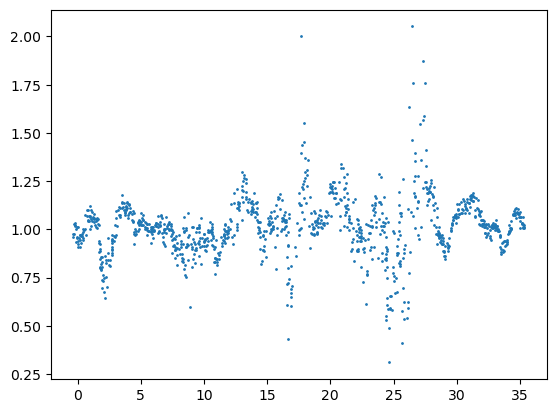

In [6]:
plt.scatter(oog.phases[1::], oog.delta_phases, s = 1)
plt.show()

In [3]:
def frame_to_time(frame, framerate):
    return frame

def delta_frame_to_time(delta_frame, reference_period, framerate):
    return (delta_frame * reference_period)

def phase_to_time(phase, framerate, reference_period):
    return (reference_period * phase) / (2 * np.pi)

def delta_phase_to_time(delta_phase, reference_period, framerate):
    return (delta_phase * reference_period) * (2 * np.pi)

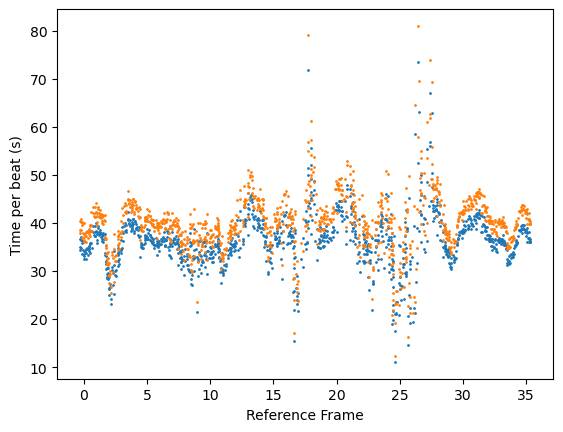

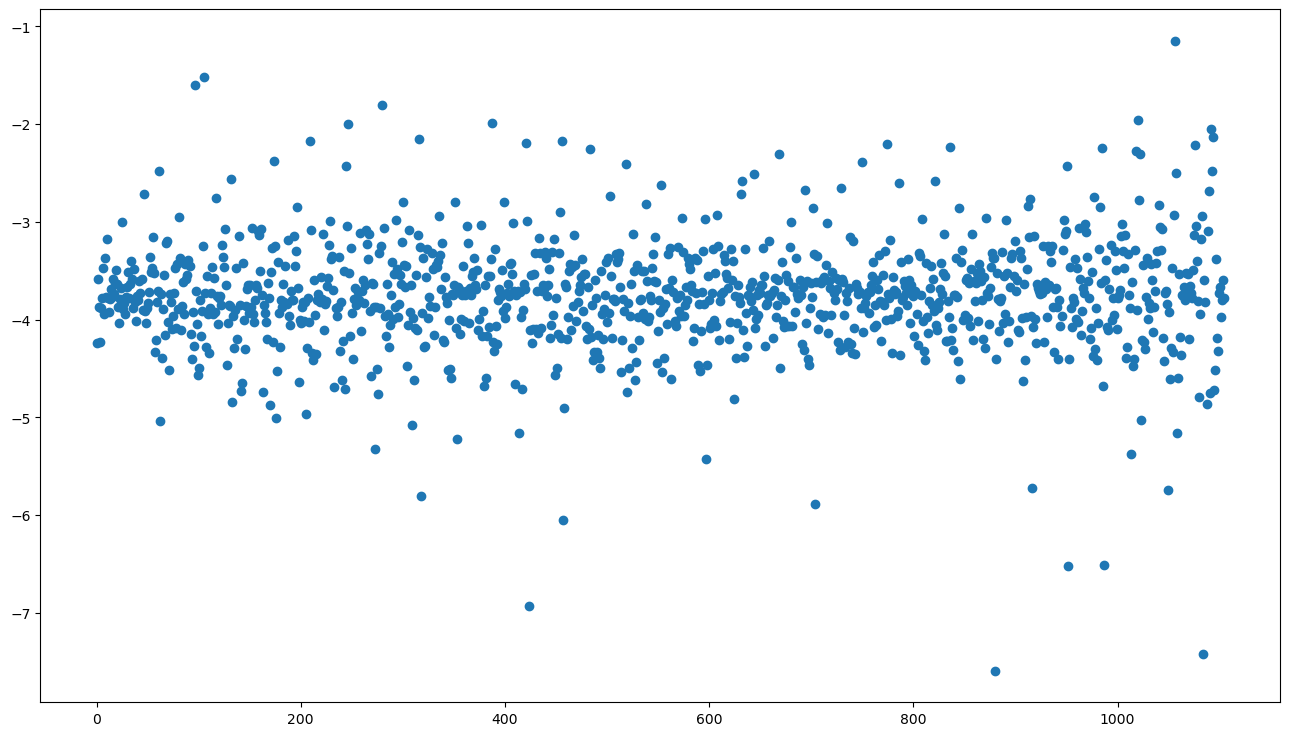

In [4]:
plt.scatter(frame_to_time(oog.phases[1::], oog.sequence_manager.frame_rate), delta_frame_to_time(oog.delta_phases, oog.sequence_manager.reference_period, oog.sequence_manager.frame_rate), s = 1)
plt.scatter(phase_to_time(oog_phases.phases[1::], oog.sequence_manager.frame_rate, oog_phases.sequence_manager.reference_period), delta_phase_to_time(oog_phases.delta_phases, oog_phases.sequence_manager.reference_period, oog_phases.sequence_manager.frame_rate), s = 1)
plt.xlabel("Reference Frame")
plt.ylabel("Time per beat (s)")
plt.show()

plt.figure(figsize = (16,9))
plt.plot(delta_frame_to_time(oog.delta_phases, oog.sequence_manager.reference_period, oog.sequence_manager.frame_rate) - delta_phase_to_time(oog_phases.delta_phases, oog_phases.sequence_manager.reference_period, oog_phases.sequence_manager.frame_rate), "o")
plt.show()